<a href="https://colab.research.google.com/github/PallaviVangari/DM_DimensionalityReduction_Assignment/blob/main/DimensionalityReduction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=da779e40d6d4b72e2ce962f3c549da81f88ed32d147895bc5efc244cb3e805ba
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


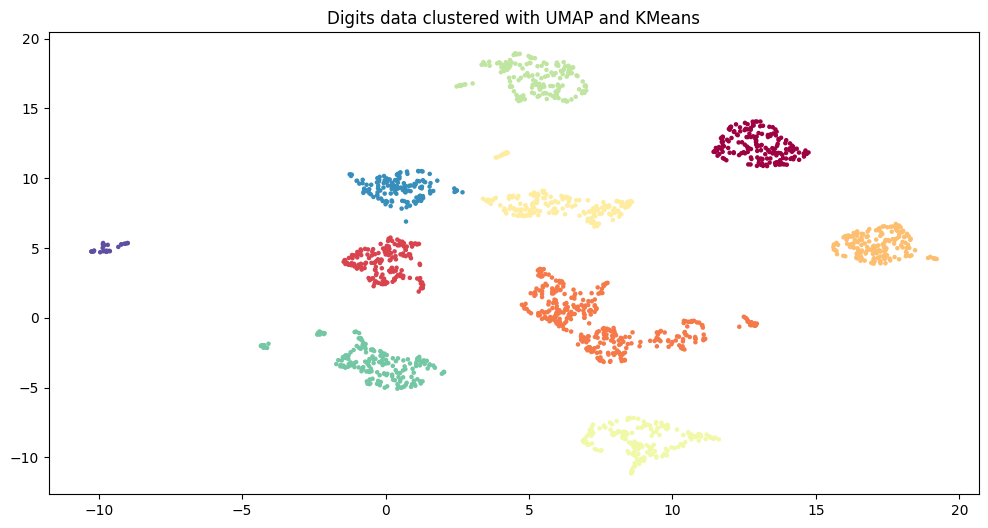

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Classification Accuracy with UMAP features: 0.99


In [1]:
# Install UMAP
!pip install umap-learn

# Import necessary libraries
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# Split data for classification task
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_digits)

# Clustering with KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# Plotting the clustering result
plt.figure(figsize=(12, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='Spectral', s=5)
plt.title('Digits data clustered with UMAP and KMeans')
plt.show()

# Dimensionality reduction for training and test sets
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=10, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

# Classification with RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_umap, y_train)
y_pred = rf_classifier.predict(X_test_umap)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy with UMAP features: {accuracy:.2f}')
